In [1]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 14.1.0


# Micro-Doppler Signatures: Rotating Turbine Analysis

## Introduction

This notebook demonstrates **micro-Doppler signature analysis**—a powerful radar technique for detecting and classifying targets based on the unique Doppler patterns created by rotating or vibrating components. Micro-Doppler has revolutionized target recognition, enabling identification of specific features like turbine blades, propellers, human gait, and vehicle wheels.

### What is Micro-Doppler?

**Micro-Doppler** refers to the additional Doppler frequency shifts produced by micro-motions of target components, superimposed on the main Doppler shift from the target's bulk motion.

**Sources of Micro-Doppler:**

1. **Rotation**: Turbine blades, propellers, helicopter rotors, wheels
2. **Vibration**: Engine vibrations, structural oscillations
3. **Articulation**: Human limb motion (walking, running)
4. **Oscillation**: Pendulum-like motions

**Doppler Shift Formula:**

For a point moving with radial velocity $v_r$:

$$f_d = \frac{2v_r}{\lambda} = \frac{2v_r f_c}{c}$$

Where:

- $f_d$ = Doppler frequency (Hz)
- $v_r$ = Radial velocity (m/s)
- $\lambda$ = Wavelength (m)
- $f_c$ = Carrier frequency (Hz)
- $c$ = Speed of light (3×10⁸ m/s)

### Rotating Components

**For a point on a rotating blade:**

The radial velocity varies sinusoidally:

$$v_r(t) = \omega R \sin(\theta(t))$$

Where:

- $\omega$ = Angular velocity (rad/s)
- $R$ = Distance from rotation axis (m)
- $\theta(t)$ = Angle at time t

**Maximum Doppler:**

$$f_{d,max} = \frac{2\omega R f_c}{c}$$

This creates a time-varying Doppler signature characteristic of rotation.

### Micro-Doppler Signature Characteristics

**Turbine/Propeller Signatures:**

1. **Periodic Modulation**: Repeats at blade passage frequency
2. **Blade Flash**: Bright returns when blade perpendicular to radar
3. **Doppler Spread**: From maximum tip velocity to zero at hub
4. **Harmonic Structure**: Multiple Doppler bands from blade count
5. **Sinusoidal Pattern**: Doppler varies as sin(ωt)

**Key Parameters:**

- **Modulation Period**: $T = 2\pi/\omega$ (rotation period)
- **Doppler Extent**: Proportional to blade tip velocity
- **Blade Count**: Creates repeated patterns per revolution
- **Hub Return**: Strong zero-Doppler component

### Applications

**Defense and Security:**

- **Aircraft Classification**: Identify by propeller/rotor signatures
- **Drone Detection**: Distinguish UAVs from birds
- **Helicopter Recognition**: Rotor blade count and speed
- **Vehicle Identification**: Wheel rotation patterns

**Industrial:**

- **Wind Turbine Monitoring**: Blade condition assessment
- **Machinery Diagnostics**: Detect bearing faults, imbalance
- **Vibration Analysis**: Structural health monitoring
- **Quality Control**: Rotating component inspection

**Biometrics:**

- **Human Gait Recognition**: Walking pattern identification
- **Activity Classification**: Running, jumping, climbing
- **Medical Diagnosis**: Gait abnormalities, tremor analysis
- **Security Screening**: Personnel identification

**Transportation:**

- **Traffic Monitoring**: Vehicle classification
- **Railway Inspection**: Wheel condition monitoring
- **Aviation Safety**: Propeller health monitoring

### Time-Frequency Analysis

**Why Time-Frequency?**

Standard FFT loses time information. For micro-Doppler, we need to see **how Doppler frequency changes over time**.

**Techniques:**

1. **Short-Time Fourier Transform (STFT)**:

   - Windowed FFT at successive time intervals
   - Creates spectrogram showing Doppler vs. time
   - Trade-off between time and frequency resolution

2. **Wavelet Transform**:

   - Multi-resolution analysis
   - Better for transient signatures

3. **Wigner-Ville Distribution**:
   - High resolution but cross-term artifacts

### FMCW Radar for Micro-Doppler

**Advantages:**

1. **Range Resolution**: Isolate target from clutter
2. **Continuous Monitoring**: Track evolving signatures
3. **High Sensitivity**: Long integration time
4. **Range-Doppler Map**: 2D visualization
5. **Compact Design**: Suitable for portable systems

**Processing Chain:**

1. Range FFT → Isolate target range bin
2. Doppler FFT → Extract velocity information
3. Range-Doppler map → Show micro-motion patterns
4. Time-frequency analysis → Detailed micro-Doppler signature

### You'll Learn How To:

- Configure 24 GHz FMCW radar for micro-Doppler detection
- Model a rotating 3-blade turbine with realistic motion
- Simulate radar returns using pulse-level ray tracing
- Apply range-Doppler FFT processing
- Generate 3D range-Doppler visualization
- Interpret micro-Doppler signatures
- Identify blade flash and modulation patterns
- Understand Doppler spread from rotation
- Relate signature to physical rotation parameters
- Analyze time-varying spectral content

### About This Example

This notebook uses [`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) to demonstrate:

**Scenario:**

- 24 GHz FMCW radar (K-band)
- 3-blade turbine at 5m range
- Blade rotation: 30°/s (5 RPM)
- Wide bandwidth: 8 GHz for high resolution

**Processing:**

- 1,280 chirps over 3.2 seconds
- Range-Doppler FFT with Chebyshev windows
- 3D visualization of micro-Doppler patterns

**Expected Results:**

- Sinusoidal Doppler modulation from blade rotation
- Three flashes per rotation (3 blades)
- Maximum Doppler from blade tips: ~±8 Hz
- Zero Doppler from stationary hub and tower

The simulation demonstrates how micro-Doppler signatures enable detection and classification of rotating components, with applications from drone detection to machinery diagnostics.

## Radar System Configuration

Configure a 24 GHz FMCW radar optimized for micro-Doppler detection.

### Import Required Modules

Import necessary RadarSimPy modules and NumPy for numerical operations.


In [2]:
# Import necessary modules for radar simulation
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver

### Transmitter Configuration

Configure FMCW transmitter with parameters optimized for micro-Doppler analysis.

#### Define FMCW Radar Transmitter

Configure wideband chirp for high-resolution micro-Doppler measurement.

**Transmitter Parameters:**

- **Frequency Range**: 20-28 GHz

  - Center: 24 GHz (K-band)
  - Bandwidth: 8 GHz (ultra-wideband)
  - Range resolution: ΔR = c/(2B) = 1.875 cm
  - Excellent for isolating turbine from background

- **Chirp Duration**: 300 μs

  - Fast-time sampling period
  - Allows frequent Doppler sampling

- **Transmit Power**: 25 dBm (~316 mW)

  - Adequate for close-range detection

- **Pulse Repetition Period**: 2.5 ms

  - Time between chirps
  - PRF = 400 Hz
  - Unambiguous velocity: ±31.25 m/s (at 24 GHz)
  - More than sufficient for turbine blade tips

- **Number of Pulses**: 1,280
  - Total observation: 1280 × 2.5 ms = 3.2 seconds
  - At 30°/s rotation: 3.2s × 30°/s = 96° rotation
  - Captures multiple blade rotations (>1 full revolution)

**Doppler Resolution:**

$$\Delta f_d = \frac{1}{N \cdot PRP} = \frac{1}{1280 \times 0.0025} = 0.3125 \text{ Hz}$$

This fine Doppler resolution enables detailed micro-Doppler analysis.

**Micro-Doppler Observability:**

For blade tip at radius R = 1m, rotating at 30°/s:

- Tip velocity: v = ωR = (30°/s × π/180) × 1m ≈ 0.52 m/s
- Maximum Doppler: f_d = 2v×f_c/c = 2×0.52×24×10⁹/(3×10⁸) ≈ 83 Hz
- Well within unambiguous range (±31.25 m/s → ±5000 Hz)


In [3]:
# Define transmitter antenna location
tx_channel = dict(
    location=(0, 0, 0),  # Position at origin
)

# Configure FMCW transmitter
tx = Transmitter(
    f=[24e9 - 4000e6, 24e9 + 4000e6],  # Frequency sweep: 20-28 GHz (8 GHz BW)
    t=300e-6,  # Chirp duration: 300 μs
    tx_power=25,  # Transmit power: 25 dBm
    prp=0.0025,  # Pulse repetition period: 2.5 ms (400 Hz PRF)
    pulses=1280,  # Number of chirps: 1280 (3.2s observation)
    channels=[tx_channel],  # Transmitter antenna configuration
)

### Receiver Configuration

Configure receiver for high-sensitivity micro-Doppler detection.

#### Define Radar Receiver

Set up receiver parameters optimized for close-range micro-Doppler measurement.

**Receiver Parameters:**

- **Sampling Rate**: 2 MHz

  - Captures beat frequencies
  - Maximum range: ~30 m (adequate for 5m turbine)

- **Noise Figure**: 6 dB

  - Low noise for sensitive detection
  - Better than typical 8 dB

- **RF Gain**: 20 dB

  - LNA amplification

- **Load Resistor**: 500 Ω

  - Power-to-voltage conversion

- **Baseband Gain**: 30 dB
  - IF amplification
  - Total gain: 50 dB


In [4]:
# Define receiver antenna location
rx_channel = dict(
    location=(0, 0, 0),  # Co-located with transmitter (monostatic)
)

# Configure radar receiver
rx = Receiver(
    fs=2e6,  # Sampling rate: 2 MHz
    noise_figure=6,  # Noise figure: 6 dB (low noise for sensitivity)
    rf_gain=20,  # RF gain: 20 dB
    load_resistor=500,  # Load resistance: 500 Ω
    baseband_gain=30,  # Baseband gain: 30 dB
    channels=[rx_channel],  # Receiver antenna configuration
)

### Create Radar System

Combine transmitter and receiver to form the complete FMCW radar for micro-Doppler analysis.


In [5]:
# Create complete radar system
radar = Radar(transmitter=tx, receiver=rx)

## Rotating Turbine Target Model

Configure a 3-blade turbine with continuous rotation to generate micro-Doppler signatures.

### Target Configuration

**Turbine Properties:**

- **Model**: 3-blade turbine (wind turbine or propeller style)
- **Location**: 5m range along x-axis (close range for strong returns)
- **Initial Orientation**: (0°, 0°, 0°) yaw, pitch, roll
- **Rotation**: Around pitch axis (Y-axis) at 30°/s
- **Stationary**: No translational motion

**Rotation Parameters:**

The `rotation_rate` parameter specifies continuous rotation:

- **Format**: (yaw_rate, pitch_rate, roll_rate) in degrees/second
- **Value**: (0, 30, 0) → Rotating around pitch axis (Y-axis)
- **Rate**: 30°/s = 0.5 RPM (5 rotations per minute)

**Physical Interpretation:**

- **Rotation Axis**: Perpendicular to radar line-of-sight
- **Blade Motion**: Creates maximum radial velocity variation
- **Optimal Viewing**: Blades sweep through radar beam
- **Micro-Doppler**: Strong sinusoidal modulation

**Expected Micro-Doppler:**

For a typical turbine with blade length ~1m:

- **Maximum tip velocity**: v_tip = ωR = (30°/s × π/180) × 1m ≈ 0.52 m/s
- **Maximum Doppler shift**: f_d = 2v/λ ≈ 2×0.52×24×10⁹/(3×10⁸) ≈ 83 Hz
- **Modulation period**: T = 360°/30°/s = 12 seconds per rotation
- **Blade passage**: 3 flashes per rotation (3 blades)

**Observation Duration:**

- Total time: 1280 × 2.5ms = 3.2 seconds
- Rotation during observation: 30°/s × 3.2s = 96°
- Partial rotations: ~0.27 revolutions (but captures full micro-Doppler pattern)


In [6]:
# Configure rotating turbine target
target_1 = {
    "model": "../models/turbine.stl",  # 3-blade turbine model
    "unit": "m",  # Model units in meters
    "location": (5, 0, 0),  # Position: 5m along x-axis
    "rotation": (0, 0, 0),  # Initial orientation: (yaw, pitch, roll) degrees
    "rotation_rate": (0, 30, 0),  # Rotation: 30°/s around pitch (Y-axis)
    "speed": (0, 0, 0),  # No translational motion
}

# Create target list for simulation
targets = [target_1]

### Visualize Turbine Model

Display the 3-blade turbine geometry showing hub and blade structure.


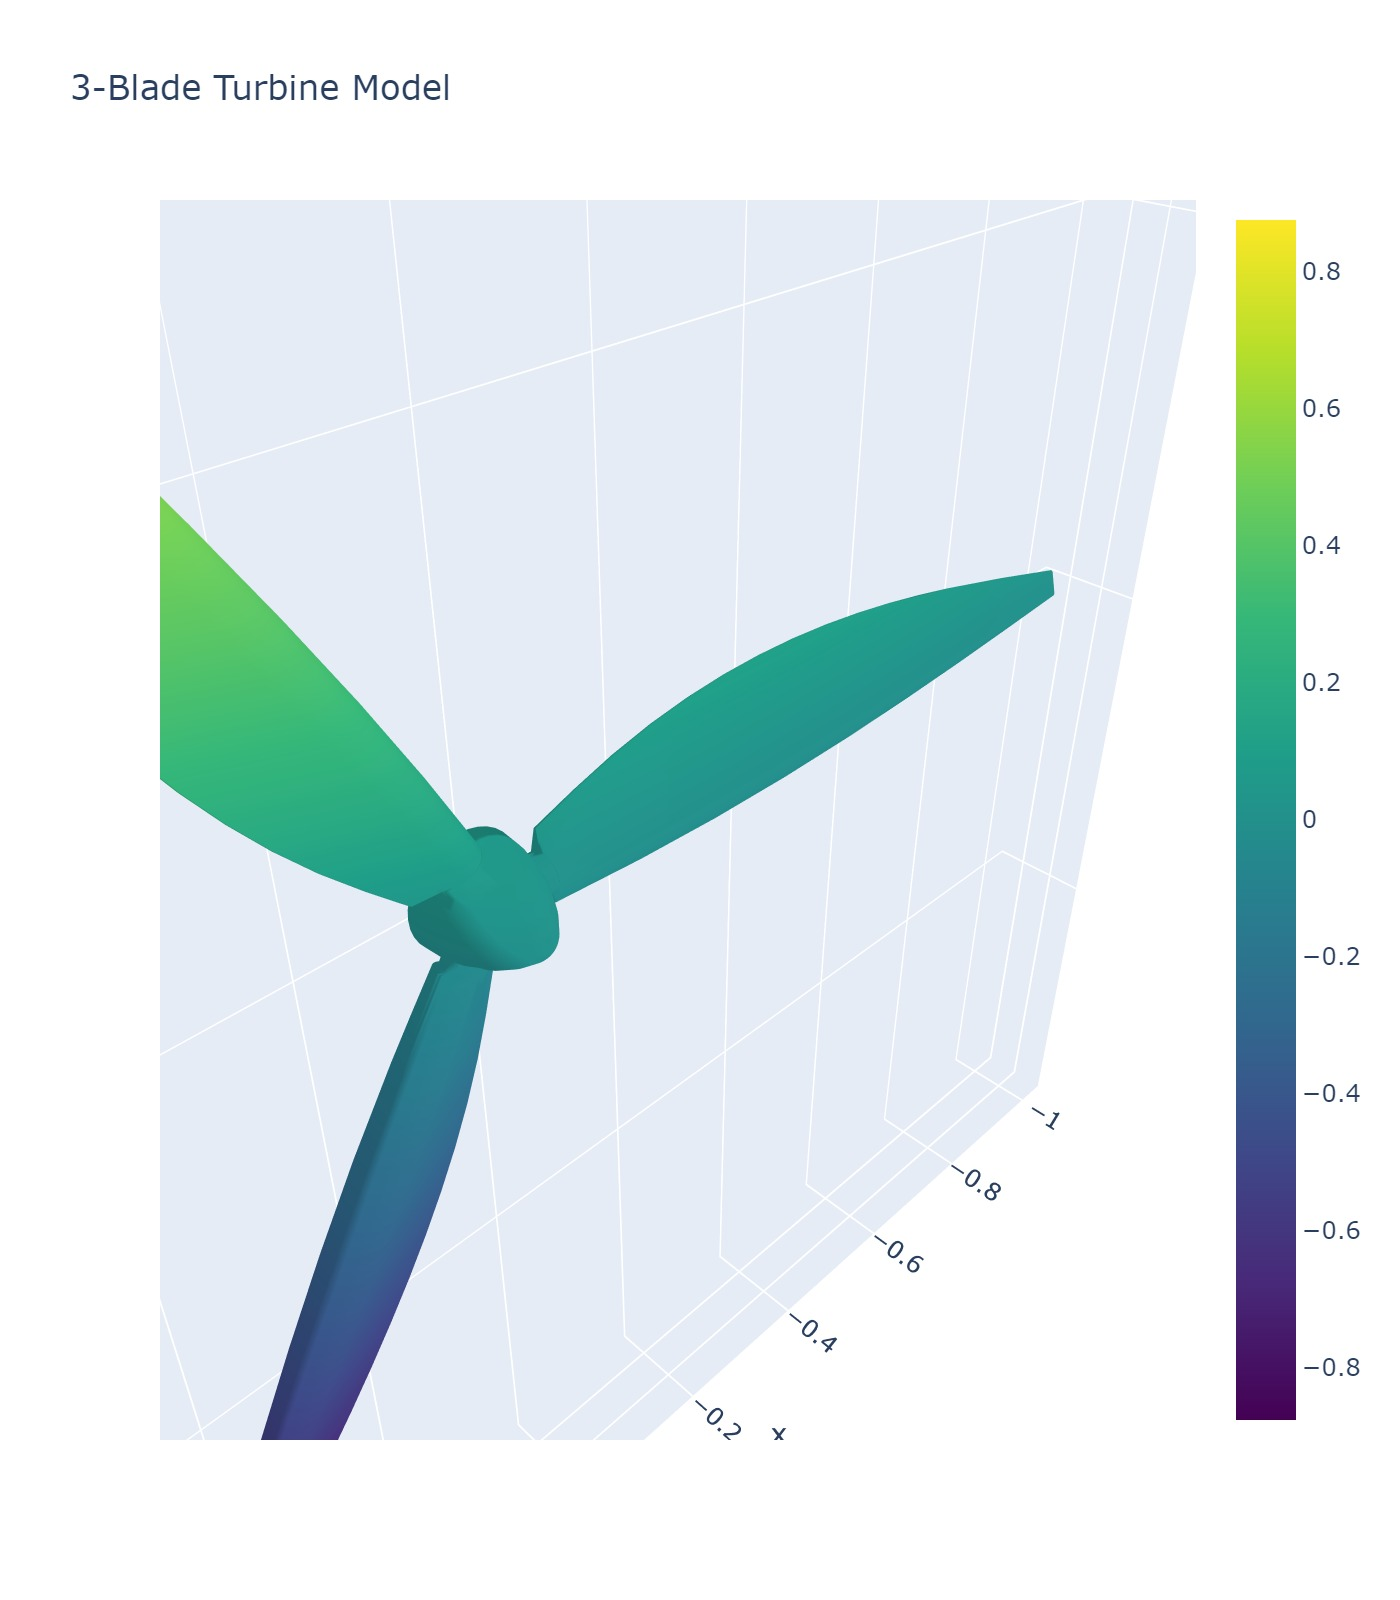

In [7]:
# Import libraries for 3D visualization
import pymeshlab
import plotly.graph_objs as go
from IPython.display import Image

# Load turbine 3D mesh
ms = pymeshlab.MeshSet()
ms.load_new_mesh(target_1["model"])
t_mesh = ms.current_mesh()

# Extract vertex positions and face connectivity
v_matrix = np.array(t_mesh.vertex_matrix())  # Vertex coordinates (N x 3)
f_matrix = np.array(t_mesh.face_matrix())  # Face indices (M x 3)

# Create 3D mesh visualization
fig = go.Figure()
fig.add_trace(
    go.Mesh3d(
        x=v_matrix[:, 0],  # X coordinates
        y=v_matrix[:, 1],  # Y coordinates
        z=v_matrix[:, 2],  # Z coordinates
        i=f_matrix[:, 0],  # Face vertex indices
        j=f_matrix[:, 1],
        k=f_matrix[:, 2],
        intensity=v_matrix[:, 2],  # Color by height
        colorscale="Viridis",  # Color scheme
    )
)

# Configure 3D plot layout
fig["layout"]["scene"]["aspectmode"] = "data"  # Maintain aspect ratio
fig["layout"]["height"] = 800  # Plot height in pixels
fig.update_layout(title="3-Blade Turbine Model")

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Radar Scene Simulation

Simulate radar returns from rotating turbine using pulse-level ray tracing.

### Simulation Parameters

**Ray Tracing Configuration:**

- **Density**: 1 ray per wavelength²

  - Standard density for moderate-complexity targets
  - Balances accuracy with computation time

- **Level**: `'pulse'`
  - Ray tracing computed once per chirp (pulse)
  - Updates turbine orientation for each chirp
  - More efficient than sample-level for rotation studies
  - Adequate for micro-Doppler analysis

**Pulse-Level Ray Tracing:**

At each pulse (every 2.5ms):

1. Turbine rotates by: 30°/s × 2.5ms = 0.075° from previous pulse
2. Ray tracer computes RCS for new orientation
3. Baseband captures instantaneous return
4. 1,280 pulses build complete micro-Doppler signature

**Output Data Structure:**

- **Dimensions**: [channels, pulses, samples]
- **Channels**: 1 (single Tx/Rx)
- **Pulses**: 1,280 (slow-time)
- **Samples**: ~600 per chirp (2 MHz × 300 μs, fast-time)

**Expected Computation:**

- Pulse-level is much faster than sample-level
- Typical runtime: 30-120 seconds depending on mesh complexity
- Captures micro-Doppler variation efficiently

**Noise Addition:**

System noise is added to simulate realistic detection conditions and assess SNR for micro-Doppler features.


In [8]:
# Import radar simulator and timing module
from radarsimpy.simulator import sim_radar
import time

# Start timing
tic = time.time()

# Simulate radar returns from rotating turbine
# density=1: Standard ray tracing density
# level='pulse': Ray tracing per chirp (efficient for rotation)
data = sim_radar(radar, targets, density=1, level="pulse")

# Extract baseband I/Q signals and add system noise
baseband = data["baseband"] + data["noise"]  # Complex samples [1, 1280, 600]

# End timing
toc = time.time()

# Display execution time
print("Exec time:", toc - tic, "s")

Exec time: 9.481520175933838 s


## Range-Doppler Processing

Apply 2D FFT to generate range-Doppler map revealing micro-Doppler signatures.

### Two-Dimensional FFT Processing

**Processing Steps:**

1. **Range FFT**: Compress chirp across fast-time

   - Window: Chebyshev (60 dB sidelobes)
   - Extracts range profiles

2. **Doppler FFT**: Analyze phase across slow-time

   - Window: Chebyshev (60 dB sidelobes)
   - Extracts velocity/Doppler information

3. **fftshift**: Center zero-Doppler frequency
   - Shifts Doppler axis for symmetric display
   - Negative Doppler = approaching, Positive = receding

**Micro-Doppler Extraction:**

The range-Doppler map shows:

- **Range dimension**: Isolates turbine at 5m
- **Doppler dimension**: Shows time-varying micro-Doppler
- **Amplitude**: Indicates scattering strength

**Expected Features:**

1. **Hub Component**: Strong return at zero Doppler (stationary)
2. **Blade Returns**: Distributed across Doppler bins
3. **Maximum Spread**: ±83 Hz (blade tips)
4. **Sinusoidal Pattern**: Time-varying Doppler from rotation
5. **Blade Flash**: Periodic bright returns (3 per revolution)


In [9]:
# Import signal processing modules
from scipy import signal
import radarsimpy.processing as proc

# Create Chebyshev windows for sidelobe suppression (60 dB)
range_window = signal.windows.chebwin(radar.sample_prop["samples_per_pulse"], at=60)
doppler_window = signal.windows.chebwin(
    radar.radar_prop["transmitter"].waveform_prop["pulses"], at=60
)

# Perform combined range-Doppler FFT
# Input: baseband [1 channel, 1280 pulses, 600 samples]
# Output: range_doppler [1, 1280 Doppler bins, 600 range bins]
range_doppler = np.fft.fftshift(
    proc.range_doppler_fft(baseband, rwin=range_window, dwin=doppler_window),
    axes=1,  # Shift only Doppler axis (axis 1) to center zero frequency
)

### Visualize Micro-Doppler Signature

Generate 3D range-Doppler map showing micro-Doppler patterns from rotating turbine blades.

**Visualization Strategy:**

- **Focus on turbine range**: Extract range bins 4.5-5.5m (around 5m target)
- **3D surface plot**: Shows amplitude vs. range and Doppler
- **Camera angle**: Optimized to reveal micro-Doppler structure

**Interpretation Guide:**

1. **Zero-Doppler Ridge**: Hub and tower (stationary components)
2. **Doppler Spread**: ±83 Hz from rotating blade tips
3. **Sinusoidal Modulation**: Blade Doppler varies as sin(ωt)
4. **Bright Flashes**: Maximum RCS when blade perpendicular to radar
5. **Three-Fold Pattern**: Three blades create repeated signatures

**Physical Meaning:**

- **Horizontal axis (Range)**: Position of scatterers
- **Vertical axis (Velocity/Doppler)**: Radial velocity of scatterers
- **Height/Color**: Scattering amplitude (RCS)

**Micro-Doppler Signature:**

The characteristic "butterfly" or "propeller" pattern in Doppler space indicates rotation, distinguishing turbines from other targets.


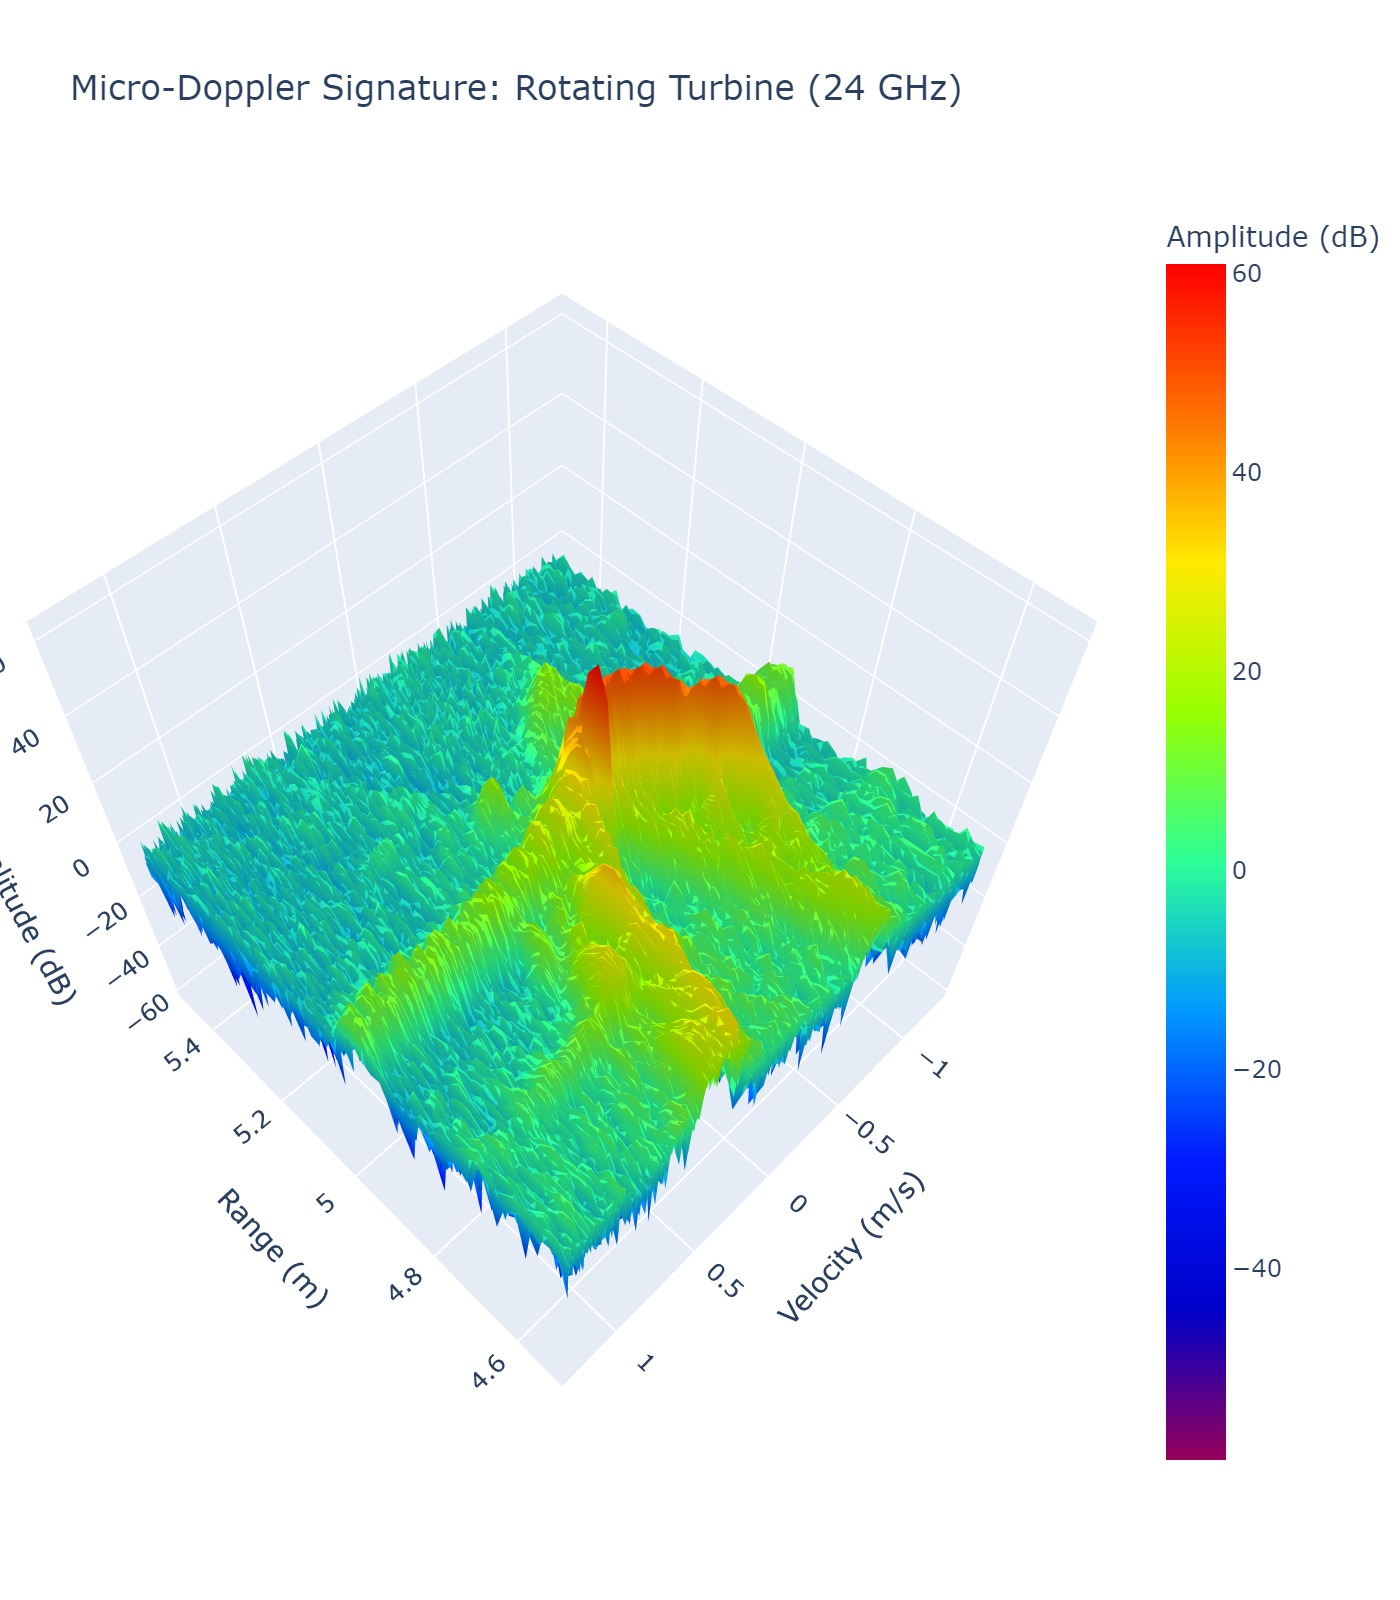

In [10]:
# Extract magnitude and convert to dB scale
temp = np.abs(range_doppler[0, :, :])
temp = 20 * np.log10(temp)

# Calculate maximum unambiguous range
max_range = (
    3e8  # Speed of light
    * radar.radar_prop["receiver"].bb_prop["fs"]  # Sampling rate
    * radar.radar_prop["transmitter"].waveform_prop["pulse_length"]  # Chirp duration
    / radar.radar_prop["transmitter"].waveform_prop["bandwidth"]  # Chirp bandwidth
    / 2  # Two-way propagation
)

# Calculate unambiguous velocity (Doppler limits)
unambiguous_speed = (
    3e8  # Speed of light
    / radar.radar_prop["transmitter"].waveform_prop["prp"][0]  # PRP
    / 24e9  # Carrier frequency
    / 2  # Two-way Doppler
)

# Create range axis
range_axis = np.linspace(
    0, max_range, radar.sample_prop["samples_per_pulse"], endpoint=False
)

# Focus on turbine range (4.5-5.5m)
rng_idx = np.where(np.logical_and(range_axis > 4.5, range_axis < 5.5))

# Create Doppler axis (centered at zero)
doppler_axis = np.linspace(
    -unambiguous_speed / 2,  # Negative velocities (approaching)
    unambiguous_speed / 2,  # Positive velocities (receding)
    radar.radar_prop["transmitter"].waveform_prop["pulses"],
    endpoint=False,
)

# Create 3D surface plot
fig = go.Figure()

fig.add_trace(
    go.Surface(
        x=range_axis[rng_idx[0]],  # Range axis (m): 4.5-5.5m
        y=doppler_axis,  # Velocity axis (m/s)
        z=temp[:, rng_idx[0]],  # Amplitude (dB)
        colorscale="Rainbow",  # Color scheme
        colorbar=dict(title="Amplitude (dB)"),
    )
)

# Configure camera angle for optimal view
camera = dict(
    up=dict(x=0, y=0, z=1),  # Up direction
    center=dict(x=0, y=0, z=0),  # Center point
    eye=dict(x=-1, y=1, z=2),  # Camera position
)

# Configure 3D plot layout
fig.update_layout(
    title="Micro-Doppler Signature: Rotating Turbine (24 GHz)",
    height=800,
    scene=dict(
        xaxis=dict(title="Range (m)", range=[4.5, 5.5]),
        yaxis=dict(title="Velocity (m/s)"),
        zaxis=dict(title="Amplitude (dB)"),
        aspectmode="cube",  # Equal aspect ratio
        camera=camera,
    ),
    margin=dict(l=0, r=0, b=60, t=100),
    legend=dict(orientation="h"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Summary

In this notebook, you learned how to detect and analyze micro-Doppler signatures using RadarSimPy:

### Key Takeaways

**1. Micro-Doppler Fundamentals**

- Understood micro-Doppler as additional Doppler from component motion
- Learned Doppler formula: f_d = 2v_r f_c / c
- Recognized sources: rotation, vibration, articulation, oscillation
- Appreciated sinusoidal patterns from rotating components

**2. Rotating Component Physics**

- Calculated radial velocity: v_r(t) = ωR sin(θ(t))
- Determined maximum Doppler: f_d,max = 2ωRf_c/c
- Understood blade tip velocity dominance
- Recognized periodic modulation from blade passage

**3. Micro-Doppler Characteristics**

- Identified blade flash (bright returns when perpendicular)
- Observed Doppler spread (hub to tip velocity range)
- Counted harmonic structure (3 patterns for 3 blades)
- Analyzed sinusoidal time-varying pattern

**4. FMCW Radar Configuration**

- Used 24 GHz (K-band) for good spatial resolution
- Applied 8 GHz bandwidth for 1.875 cm range resolution
- Set 400 Hz PRF for ±31.25 m/s unambiguous velocity
- Configured 1,280 chirps for fine Doppler resolution (0.3125 Hz)

**5. Target Modeling**

- Modeled 3-blade turbine with realistic geometry
- Configured continuous rotation at 30°/s (5 RPM)
- Set rotation axis for optimal micro-Doppler generation
- Captured 96° rotation over 3.2 second observation

**6. Pulse-Level Ray Tracing**

- Used pulse-level simulation for computational efficiency
- Updated turbine orientation every 2.5 ms (per chirp)
- Captured instantaneous RCS at each orientation
- Built complete micro-Doppler signature efficiently

**7. Range-Doppler Processing**

- Applied 2D FFT with Chebyshev windowing (60 dB)
- Used fftshift to center zero-Doppler frequency
- Generated range-Doppler map showing micro-motion
- Isolated turbine range for focused analysis

**8. Signature Interpretation**

- Identified zero-Doppler hub return (stationary)
- Observed ±83 Hz Doppler spread (rotating blades)
- Recognized three-fold pattern (3 blades)
- Distinguished turbine from other target types

### Experiment Further

Try modifying the parameters to explore different scenarios:

**1. Rotation Rate Variations**:

- Increase to 60°/s, 120°/s (faster rotation)
- Decrease to 10°/s (slower rotation)
- Observe Doppler spread changes: f_d ∝ ω
- Test detection at different speeds

**2. Frequency Band Studies**:

- Test different frequencies: 10 GHz, 77 GHz, 94 GHz
- Observe wavelength effect on Doppler: f_d ∝ f_c
- Compare micro-Doppler sensitivity
- Understand frequency selection trade-offs

**3. Blade Count Variations**:

- Model 2-blade, 4-blade, 5-blade turbines
- Observe pattern repetition per revolution
- Analyze harmonic structure differences
- Practice blade count estimation

**4. Observation Time**:

- Extend to 10 seconds (multiple revolutions)
- Reduce to 1 second (partial rotation)
- Observe Doppler resolution: Δf_d = 1/(N×PRP)
- Balance resolution vs. processing time

**5. PRF Optimization**:

- Increase PRF: 1 kHz, 2 kHz
- Observe unambiguous velocity reduction
- Test Doppler aliasing effects
- Understand PRF selection trade-offs

**6. Bandwidth Studies**:

- Reduce to 1 GHz, 2 GHz bandwidth
- Increase to 4 GHz (if possible)
- Observe range resolution impact
- Test target isolation capability

**7. Range Variations**:

- Place turbine at 10m, 20m, 50m
- Observe SNR degradation with range
- Test maximum detection range
- Understand link budget effects

**8. Multiple Turbines**:

- Add second turbine at different range
- Configure different rotation rates
- Test simultaneous detection
- Practice multi-target separation

**9. Orientation Studies**:

- Rotate axis: test (30,0,0) yaw rotation
- Try (0,0,30) roll rotation
- Observe aspect angle effects
- Understand optimal viewing geometry

**10. Time-Frequency Analysis**:

- Extract single range bin time series
- Compute spectrogram (STFT)
- Analyze micro-Doppler evolution
- Compare with range-Doppler map

### Resources

- RadarSimPy Documentation: https://radarsimx.com
- RadarSimPy Simulator Module: https://radarsimx.github.io/radarsimpy/simulator.html
- Micro-Doppler Theory: Time-varying Doppler from micro-motions
- Rotating Scatterers: Blade flash and sinusoidal modulation
- Range-Doppler Processing: Two-dimensional FFT techniques
- Time-Frequency Analysis: STFT and spectrograms
- Target Classification: Signature-based recognition
- Drone Detection: UAV identification via micro-Doppler
- Human Activity Recognition: Gait analysis and classification
- Machinery Diagnostics: Vibration and fault detection
